# 1.0 OVERVIEW

This project is divided into main sections:

1. An Introduction to the boxplot including it's history and use.

2. An explaination of the key terminology of the boxplot illustrated with examples of the boxplot in use.

3. A comparison of the boxplot and it's alternatives.

Throughout this project I will be using a dataset consisting of the Nominal Per Capita GDP in Dollar of every country / territory in the worlds devided into 6 continents to show the box plot in use and explain it's key elements and terminology. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
url = "https://raw.githubusercontent.com/ConorHogan/FODA-Project/master/GDPperCountry.csv"
gdp_percountry = pd.read_csv(url)

In [3]:
gdp_percountry

,Continent,Country_Territory,Per_Cap_GDP_Nom_Dollars
0,Asia,Macau,77111
1,Asia,Hong Kong,46080
2,Europe,Luxembourg,105863
3,Europe,Switzerland,80637
4,Europe,Norway,75389
5,Europe,Iceland,70248
6,Europe,Ireland,68710
7,Asia,Qatar,61024
8,North_America,United States,59792
9,Asia,Singapore,57713


# 2.0 An Introduction to Boxplots

Method for graphically depicting groups of numerical data through their quartiles

*Key Elements of a box-plot:*
* May include "whiskers" showing variability outside upper and lower quartiles
* Outliers may be plotted as individual points
* Non parametric in that they show variations in samples of population without making assumptions on distribution
* Spacings within the box show "dispersion" and "skewness" of data
* Allow the viewer to visually estimate L-estimators
    * Interquartile range
    * Midhinge 
    * Range
    * Mid-Range
    * Trimean
* The band within the box represents the median or second quartile
* Width of the individual boxes is generally used to describe the size of the group it represents. Usually the width is the square route of the group size.


### 1.1 Inventor of the boxplot

The boxplot was first created by John Turkey, an American Mathemtician and brother in law of one the key players in our previous project; Frank Anscombe. He introduced in his book *"Explaratory Data Analysis"* published in 1977.

*"Among Tukey's most far-reaching contributions was his development of techniques for "robust analysis," an approach to statistics that guards against wrong answers in situations where a randomly chosen sample of data happens to poorly represent the rest of the data set. Tukey also pioneered approaches to exploratory data analysis, developing graphing and plotting methods that are fixtures of introductory statistics texts, and authored many publications on time series analysis and other aspects of digital signal processing that have become central to modern engineering and science."* - Obituary of John Tukey - Princeton https://pr.princeton.edu/news/00/q3/0727-tukey.htm



# 3.0 Key Terminology Relating to Boxplots and examples of Use

A box and whisker plot can be used to display the five number summary of a dataset. I say can, because sometimes the whiskers on the boxplot are used to display different information. However, a standard boxplot will show:

1. The Minimum value
2. The First Quartile
3. The Median
4. The Third Quartile 
5. The Maximum

I will explain these items below by looking at GDPs for Europe.

In [4]:
europe_set = gdp_percountry.loc[gdp_percountry["Continent"]=="Europe"]
europe_set

,Continent,Country_Territory,Per_Cap_GDP_Nom_Dollars
2,Europe,Luxembourg,105863
3,Europe,Switzerland,80637
4,Europe,Norway,75389
5,Europe,Iceland,70248
6,Europe,Ireland,68710
10,Europe,Denmark,56630
11,Europe,Australia,55692
12,Europe,Sweden,52925
13,Europe,Netherlands,48555
14,Europe,San Marino,47595


We can get all the information we need to create a boxplot using Pandas *".describe"* function, but I will go into greater detail below.

In [5]:
europe_set.describe()

,Per_Cap_GDP_Nom_Dollars
count,43.000000
mean,30337.581395
std,24854.225944
min,2280.000000
25%,10870.000000
50%,21158.000000
75%,46637.000000
max,105863.000000


## 3.1 The Max and Min - The boxplot's Whiskers

The Max and Min are the highest and lowest values in the dataset. In a standard box plot these will form the two points that form the "whiskers" on each boxplot.

## 3.2 Finding the Median - The boxplot's "band"

Finding the median is the first step in going on to indentify the Quartiles.

If the data you are looking has an even amount of numbers, the median can be found by getting the average of the two middle numbers in the range. 

In our case, this isn't necessary as there an odd number of countries in Europe. As you can see above, the median GDP for the countries in Europe is $21,158, which is Portugals GDP.

In [6]:
median_country = europe_set.loc[europe_set["Per_Cap_GDP_Nom_Dollars"] == 21158]
median_country

,Continent,Country_Territory,Per_Cap_GDP_Nom_Dollars
37,Europe,Portugal,21158


## 3.3 Quartiles & Quartile Range

A quartile can be defined as *"each of four equal groups into which a population of results can be devided"*. The quartiles are found by first identifing the median or the midpoint value of a dataset, which we have done above. You can then get the quartiles, by finding the medians of the two halves either side of the main median.

We can view the halves of the dataset by cutting along the median:

In [7]:
print("Upper Half")
europe_set_uphalf = europe_set.loc[europe_set["Per_Cap_GDP_Nom_Dollars"] > 21158]
europe_set_uphalf

Upper Half


,Continent,Country_Territory,Per_Cap_GDP_Nom_Dollars
2,Europe,Luxembourg,105863
3,Europe,Switzerland,80637
4,Europe,Norway,75389
5,Europe,Iceland,70248
6,Europe,Ireland,68710
10,Europe,Denmark,56630
11,Europe,Australia,55692
12,Europe,Sweden,52925
13,Europe,Netherlands,48555
14,Europe,San Marino,47595


In [8]:
print("Lower Half")
europe_set_lowerhalf = europe_set.loc[europe_set["Per_Cap_GDP_Nom_Dollars"] < 21158]
europe_set_lowerhalf

Lower Half


,Continent,Country_Territory,Per_Cap_GDP_Nom_Dollars
39,Europe,Czech Republic,20401
40,Europe,Estonia,19735
41,Europe,Greece,18637
43,Europe,Slovakia,17655
47,Europe,Lithuania,16730
52,Europe,Latvia,15550
57,Europe,Hungary,14209
58,Europe,Poland,13821
59,Europe,Croatia,13271
63,Europe,Russia,10955


### 3.3.1 First and Third Quartiles - The top and bottom of the box

The First and Third Quartiles can be found by getting the medians of the values above and below the median of the entire range. The First Quartile is the median of the Lower Half of the data. The Third Quartile is the median of the Upper Half.

We already got these numbers using the Pandas ".describe" function above. The list of countries in the Third and First quartiles are shown below.

In [9]:
print("Third Quartile")
europe_thirdQ = europe_set.loc[europe_set["Per_Cap_GDP_Nom_Dollars"] >= 46637]
europe_thirdQ

Third Quartile


,Continent,Country_Territory,Per_Cap_GDP_Nom_Dollars
2,Europe,Luxembourg,105863
3,Europe,Switzerland,80637
4,Europe,Norway,75389
5,Europe,Iceland,70248
6,Europe,Ireland,68710
10,Europe,Denmark,56630
11,Europe,Australia,55692
12,Europe,Sweden,52925
13,Europe,Netherlands,48555
14,Europe,San Marino,47595


In [10]:
print("First Quartile")
europe_firstQ = europe_set.loc[europe_set["Per_Cap_GDP_Nom_Dollars"] <= 10870]
europe_firstQ

First Quartile


,Continent,Country_Territory,Per_Cap_GDP_Nom_Dollars
64,Europe,Romania,10785
75,Europe,Bulgaria,8077
77,Europe,Montenegro,7678
89,Europe,Serbia,5901
91,Europe,Belarus,5727
95,Europe,Macedonia,5474
98,Europe,Bosnia and Herzegovina,5180
103,Europe,Albania,4544
113,Europe,Kosovo,3944
131,Europe,Ukraine,2583


### 3.3.2 Interquartile Range - The lenght of the box

The Interquartile Range is the data between the First and Third Quartile. This is basically the middle 50% of the data and makes up the length of the box. I say length, becasue width can be based on other factors. See below:

In [11]:
print("Inter Quartile Range")
europe_IQR = europe_set.query("Per_Cap_GDP_Nom_Dollars > 10870 & Per_Cap_GDP_Nom_Dollars < 46637")
europe_IQR

Inter Quartile Range


,Continent,Country_Territory,Per_Cap_GDP_Nom_Dollars
16,Europe,Finland,45927
18,Europe,Germany,44769
19,Europe,Belgium,43488
22,Europe,France,39932
23,Europe,United Kingdom,39800
26,Europe,Italy,31996
29,Europe,Spain,28358
32,Europe,Malta,27326
33,Europe,Cyprus,25380
36,Europe,Slovenia,23654


## 3.4 Bring this all together

Below I have included a basic boxplot for our Europe dataset. In this example I have forced the graph to use the "range" (the max and min values) as the points for the whiskers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1feacbb6c18>,
 'caps': [<matplotlib.lines.Line2D at 0x1feacbc9518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1feacbb6ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1feacbc9d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1feacbcf1d0>],
 'means': []}

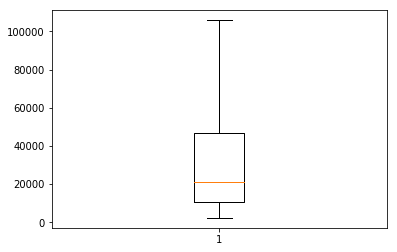

In [12]:
plt.boxplot(x=europe_set["Per_Cap_GDP_Nom_Dollars"], whis="range")


In the above we can see that the our top whisker and bottom whisker line up up the max and min values(105,863 & 2,280).

The top of the box and bottom of the box are the third and first quartile (46,637 & 10,870).

The band across the middle lines up with the median value (21,158).

Finally, we can see that as the median number is much closer to the min than the max based on the position of the band. I will discuss what this indicates in more detail when looking at skew and kurtosis below.

## 3.5 Boxplot Variations and their Uses

There are number variations that can be made on the standard boxplot. In this section we will look at five main areas:

1. Different uses for Whiskers
2. Plotting outliers and the spread of individual datapoints
3. The use of Width
4. Notched Boxes
5. Representing Skew and Kurtosis

### 3.5.1 Whisker Variations

There are several different things tha the whiskers on a boxplot can represent. I have already shown one use above, the min and max numbers in the dataset. 

Other uses for the whiskers include:
1. The lowest and highest datapoint within 1.5 times the length of the Interquartile range (the length of the box) from the first and third quartile.

2. One standard deviation above and below the mean of the data.

3. The 9th percentile and 91st percentile, or the 2nd percentile and 98th percentile.


We will look at each of these in turn.

#### 3.5.1.1 The Tukey Boxplot

When John Tukey first created the boxplot the whiskers were used to show the first of the options in our list above. This has lead to this style being referred to as the Tukey Boxplot.

There is not statistical significance to values that are 1.5 the IQR above or below the first and third quartiles. Tukey simply chose this as the limits for his whiskers when he created the plot. They are intended to mark off the reasonable values for the outliers.

If we continue to use our Europe dataset we can find the limits of the whiskers in this case by first calculating the IQR. 

In [13]:
Q1_EU = 10870
Q3_EU = 46637
IQR_EU = Q3_EU - Q1_EU
IQR_EU

35767

In [14]:
Whisker_length = IQR_EU * 1.5
Whisker_length

53650.5

In [15]:
UpperWhisker = Q3_EU + Whisker_length
LowerWhisker = Q1_EU - Whisker_length
print(UpperWhisker)
print(LowerWhisker)

100287.5
-42780.5


As we can see, our whisker limits are 100,287.5 and -42780.5 However, these are not where this whiskers will be set on the plot. Instead the whiskers stop at the last datapoint / value less than the upper whisker value and greater than the lower whisker value.

So the upper whisker for Europe is Switzerland at 80,637 while our lower whisker is Moldova at 2,280. 

See an example graph below, where I have set the whiskers to 1.5 times the IQR through the *"whis"* parameter in matplotlib.

{'whiskers': [<matplotlib.lines.Line2D at 0x1feadc19278>,
 'caps': [<matplotlib.lines.Line2D at 0x1feadc19b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1feadc19128>],
 'medians': [<matplotlib.lines.Line2D at 0x1feadc233c8>],
 'fliers': [],
 'means': []}

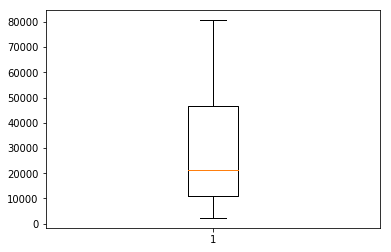

In [16]:
plt.boxplot(x=europe_set["Per_Cap_GDP_Nom_Dollars"], whis=1.5, showfliers=False)

#### 3.5.1.2 Standard Deviation Whisker

Another type of whisker that can be used is measured by finding the figure for what is one standard deviation above and below the mean of the dataset.

The **Standard Deviation** allows us to see how spread out the data is from the average. A low standard deviation indicates values are clustered around the mean while a high standard deviation indicates a wider spread.

So in order to find our whiskers we need to find the mean and standard deviation. 

In [17]:
mean_EU = europe_set["Per_Cap_GDP_Nom_Dollars"].mean()
mean_EU

30337.581395348836

In [18]:
std_dev_EU = europe_set["Per_Cap_GDP_Nom_Dollars"].std()
std_dev_EU

24854.225944430225

Using the above values we can calculate our upper and lower whisker values.

In [19]:
Upper_sdev_whisk = std_dev_EU + mean_EU
Lower_sdev_whisk = mean_EU - std_dev_EU
print(Upper_sdev_whisk)
print(Lower_sdev_whisk)

55191.80733977906
5483.355450918611


None of the standard python graphing tools allow for this style of whisker to be specified, but you could calculate these figures difference from the IQR and then user Matplotlib to chart.

#### 3.5.1.3 Percentile Whiskers

Whiskers can also be based on lower and upper percentile figures, most commonly the 9th percentile and 91st percentile, or the 2nd percentile and 98th percentile.

A **Percentile** is a number derived by dividing a population into 100 groups based on a the values of a particular variable.

For example the 9th percentile for GDP would be the number under which 9% of countries existing. The 91st percentile would be the number under which 91% of countries exist. 

We can use Numpy to calculate our percentile values, but as with the standard deviation, none of the Python graphing tools allow for using percentiles for whiskers as standard.


In [20]:
ninty_first = np.percentile(europe_set["Per_Cap_GDP_Nom_Dollars"].values, 91)
ninty_first

69048.36

In [21]:
ninth = np.percentile(europe_set["Per_Cap_GDP_Nom_Dollars"].values, 9)
ninth

5040.08

### 3.5.2 Plotting Outliers and the Spread of Data

One of the uses for whiskers is to identify the cut-off point where data points should be recorded as outliers. Outliers are usually plotted as individual datapoint in the boxplot. 

For example in the Tukey Boxplot I specifically told Matplotlib to not include the outlier beyond the whiskers using the *"showfliers"* parameter. If I remove this, you can see that Luxemburg will be identified as an outlier as it is beyond the upper whisker. There are no lower outliers because the whisker is the lowest value in the dataset (Moldova)

{'whiskers': [<matplotlib.lines.Line2D at 0x1feadc83908>,
 'caps': [<matplotlib.lines.Line2D at 0x1feadc8e208>,
 'boxes': [<matplotlib.lines.Line2D at 0x1feadc837b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1feadc8ea58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1feadc8ee80>],
 'means': []}

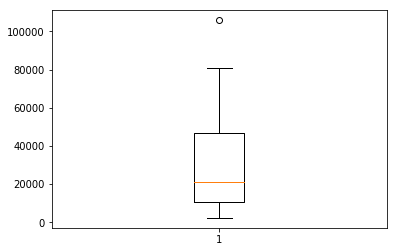

In [22]:
plt.boxplot(x=europe_set["Per_Cap_GDP_Nom_Dollars"], whis=1.5)

If we look at the countries in each continent side by side we can see all have outliers beyond the upper whisker, but none have outliers below the lower whisker as the the lowest value in each case is inside 1.5 IQR from the first quartile.

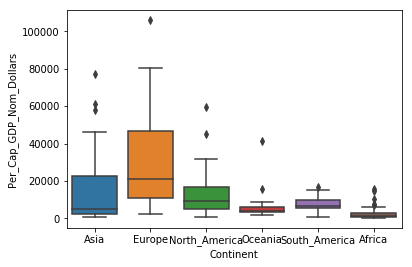

In [23]:
sns.boxplot(x="Continent", y="Per_Cap_GDP_Nom_Dollars", data=gdp_percountry)

If we were using the max and min values as the whisker "fences" there would be no outliers to plot as all would be within the max and min.

Plotting outliers is important as it lets the viewer know that there could be certain datapoints present that are throwing off the summary statistics and maybe should be investigate further or excluded.

While not traditionally and element of a boxplot, it can be helpful to plot the full spread of the data over the boxplot, such as in the example below. This allows you the viewer to see the location of the individual datapoints rather than just the summary statistics. The viewer will have some sense of the spread from the length of the box itself and the whiskers, but plotting the individual points gives ever more detail.

Looking at all the countries below, we can see there are a handful of countries on each continent that account for the a disporportionate amount of the total GPD.

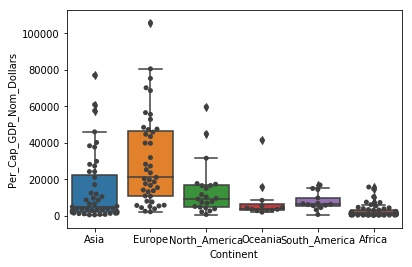

In [24]:
sns.boxplot(x="Continent", y="Per_Cap_GDP_Nom_Dollars", data=gdp_percountry)
sns.swarmplot(x="Continent", y="Per_Cap_GDP_Nom_Dollars", data=gdp_percountry, color=".25")

### 3.5.3 Width of Boxes

The width of the boxes in a boxplot can be used to indicate the count or amount of values in a group that is being plotted. For example in our GDP datasets case, the counts for the numbers of countries in each continent are displayed below.

In [25]:
gdp_percountry.set_index("Continent")
country_counts = gdp_percountry.pivot_table(index="Continent", values="Country_Territory", aggfunc=len)
country_counts

,Country_Territory
Continent,
Africa,53
Asia,47
Europe,43
North_America,22
Oceania,12
South_America,13


By convention, the width of the box in calculated by getting the square root of the size of the group. 

In [26]:
import math
africa_w = math.sqrt(53)
asia_w = math.sqrt(47)
europe_w = math.sqrt(43)
northa_w = math.sqrt(22)
oceania_w = math.sqrt(12)
southa_w = math.sqrt(13)
print(africa_w)
print(asia_w)
print(europe_w)
print(northa_w)
print(oceania_w)
print(southa_w)

7.280109889280518
6.855654600401044
6.557438524302
4.69041575982343
3.4641016151377544
3.605551275463989


The above would therefore be the widths of the respective boxes in the plot.


### 3.5.4 Notched Boxes

Notches in the box itself are used to illustrate the confidence interval around the median for that group of data. 

The confidence interval is the range of results obtained when taking samples of the population (list of values) and trying to calculate the median. The length of the notch in the boxplot shows the 95% confidence interval for the position of the median in the data.

The size of the confidence interval can depend on two things; the size of the samples taken and the variation withing the population.

As you can see below, our dataset isn't the best for showing confidence intervals because the population is small and there is a lot of variation within it.

Also, since we know that the population in our dataset is the entire list of countries in the world, calculating a confidence interval is kind of pointless. We know for sure what the median is.

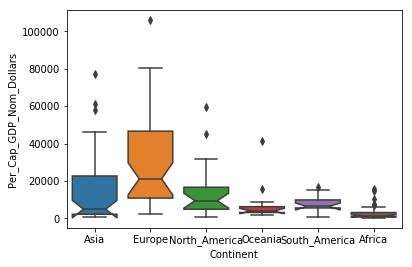

In [27]:
sns.boxplot(x=gdp_percountry["Continent"], y=gdp_percountry["Per_Cap_GDP_Nom_Dollars"], notch=True)

### 3.5.5 Skew

All boxplots give a sense of skew. This is easier to demonstrate if the boxplot is displayed horizontally. 

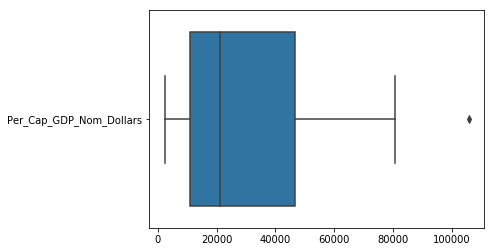

In [28]:
sns.boxplot(data=europe_set, orient="h")

If we look at the above we can see that the data is skewed to the left, due to the position of the median and the lenght of the whiskers. Skew refers to the shape of the distribution of the data. The median for Europe is on the right indication the majority of the values are located there. The width of the whiskers is wide on the right and short on the left showing that there are spread of values to the right. This means the data is skewed right. It also indicates the mean is to the right of the median.

It is also possible to diplay the skew of the data by thickening the end of the box in the plot to indicate the direction of the skew. 

0.46070841541788665

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


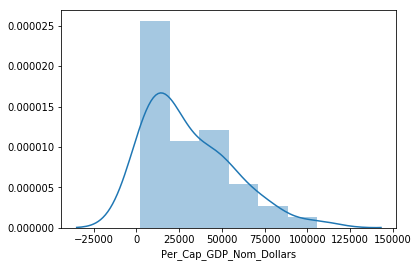